In [3]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set(context='notebook',style='darkgrid',palette='colorblind',rc=None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('mushrooms.csv')

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.isnull().sum()/df.shape[0]

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [6]:
def grid_plot(feature):
    grid=sns.FacetGrid(data=df,col='class')
    grid.map(sns.countplot,feature)

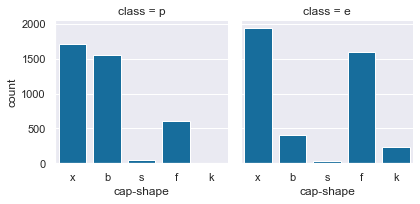

In [7]:
grid_plot('cap-shape')

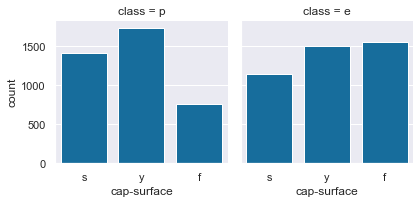

In [8]:
grid_plot('cap-surface')

In [9]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])

<AxesSubplot:>

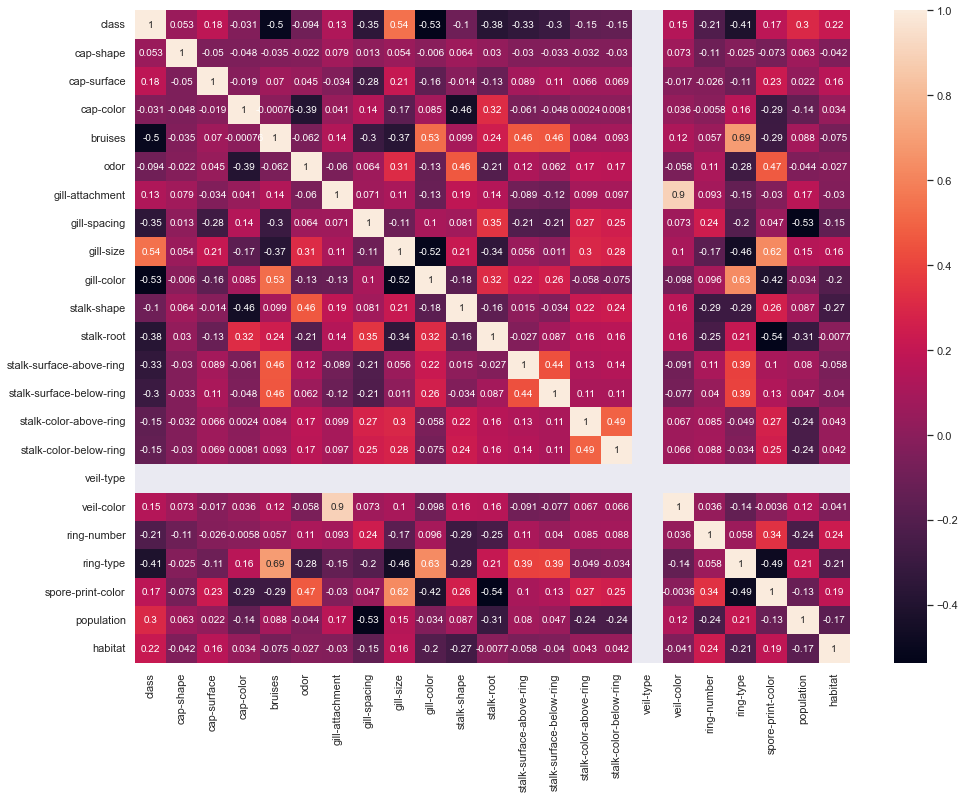

In [11]:
%matplotlib inline 
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

In [12]:
X = df.drop(['class','veil-type','gill-attachment','ring-type','gill-color','bruises'],axis=1)
y = df['class']

In [22]:
%pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 MB 330.2 kB/s eta 0:00:0000:0100:25
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 378.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 314.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 321.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 199.7 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 157.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 201.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 124.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) 



In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models={
    'RandomForestClassifier':RandomForestClassifier(max_depth=10,random_state=42),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=10, random_state=42),
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'svc':SVC(random_state=42)
}

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test] 
# print('X_train shape', x_train.shape)
# print('y_train shape', y_train.shape)
# print('X_test shape', x_test.shape)
# print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['class'].value_counts().values/ len(df))


ratio of target in y_train : [0.51792583 0.48207417]
ratio of target in y_test : [0.51815385 0.48184615]
ratio of target in original_data : [0.51797144 0.48202856]


In [16]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,log_loss
def get_loss(y_true,y_pred,retu=False):
    pre = precision_score(y_true,y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [18]:
# train_eval_cross
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

def train_eval_model(models,x,y):
    for name,model in models.items():
        print(name,":")
        model.fit(x,y)
        get_loss(y,model.predict(x))
        print('-'*30)
        

def train_eval_cross(models,x,y,folds):
    x=pd.DataFrame(x)
    y=pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')
        for train,test in folds.split(x,y):
            model.fit(x.iloc[train],y.iloc[train])
            y_pred=model.predict(x.iloc[test])
            ls.append(get_loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)

In [19]:
train_eval_cross(models,X,y,skf)

RandomForestClassifier :
 pre     1.000000e+00
 rec     1.000000e+00
 f1      1.000000e+00
 loss    9.992007e-16
 acc     1.000000e+00
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     1.000000e+00
 rec     1.000000e+00
 f1      1.000000e+00
 loss    9.992007e-16
 acc     1.000000e+00
Name: 0, dtype: float64
------------------------------
LogisticRegression :
 pre     0.953149
 rec     0.927984
 f1      0.940337
 loss    1.959871
 acc     0.943256
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     1.000000
 rec     0.997447
 f1      0.998721
 loss    0.042520
 acc     0.998769
Name: 0, dtype: float64
------------------------------
svc :
 pre     0.997688
 rec     0.988506
 f1      0.993069
 loss    0.229582
 acc     0.993353
Name: 0, dtype: float64
------------------------------


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model_NN = Sequential()
model_NN.add(Dense(32, input_dim=17, activation='tanh'))
# Dropout(0.2),
model_NN.add(Dense(16, activation='tanh'))
# Dropout(0.2),
model_NN.add(Dense(1, activation='softmax'))
# Compile model
model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)
model_NN.fit(x=X_train, 
          y=y_train, 
          epochs=500,
#           batch_size=200,
          validation_data=(X_test, y_test),
           callbacks=[early_stop]
          )
model_NN.evaluate(X_test, y_test)
pred = model_NN.predict(X_test)
y_test.iloc[9]

model_NN.predict(np.array([X_test.iloc[9]]))